### 다항 분포 (Multinomial Distribution)

+ 카테고리 분포의 확장

+ 베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼 독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포(Multinomial distribution)가 된다.

[참고] 데이터 사이언스 스쿨 : https://datascienceschool.net/view-notebook/ab191449d60542edadaae91bc12deb99/


#### * seaborn 에서 2차원 복합 데이타를 표현하는 플롯

    * barplot
    * pointplot
    * boxplot 
    * violinplot
        
    * stripplot : scatter plot 처럼 모든 데이터를 점으로 표시                   
    * swarmplot : stripplot과 비슷한데, 데이터를 표시하는 점이 겹치지 않도록 옆으로 이동되어 표시

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

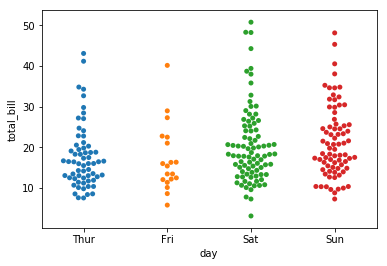

In [6]:
""" [복습] seaborn 플롯 확인"""
tips = sns.load_dataset('tips')

# sns.boxplot(x='day', y='total_bill', data=tips)
# sns.violinplot(x='day', y='total_bill', data=tips)

# sns.stripplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips)

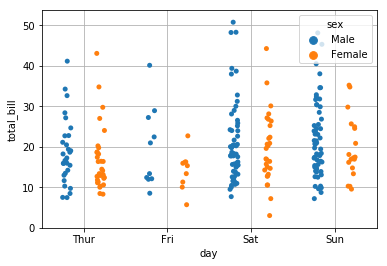

In [13]:
""" 다차원 복합 데이타"""
# sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)
# sns.violinplot(x='day', y='total_bill', hue='sex', data=tips)
# sns.stripplot(x='day', y='total_bill',hue='sex', data=tips, dodge=True)
# sns.swarmplot(x='day', y='total_bill',hue='sex', data=tips, dodge=True)

plt.grid(True)

In [16]:
""" scipy에서 제공하는 다항 분포 : multinomial 클래스 

        ` 카테고리 분포 : N은 1로 설정
        ` 다항 분포 : N으로 설정
"""
N = 30
theta = [0, 0, 0.1, 0.2, 0.3, 0.4]
rv = sp.stats.multinomial(N, theta)

np.random.seed(0)
X = rv.rvs(100)
print(X[:10])

# [분석] 주사위를 30번 던졌을 때의 확률 [0, 0, 0.1, 0.2, 0.3, 0.4]에 대한 결과 중
# 하나는 [ 0  0  3  6  9 12]를 보면 주사위 6이 나올 확률은 30번 중에서 12번이라는 것이다

[[ 0  0  3  6  9 12]
 [ 0  0  5  9  6 10]
 [ 0  0  3  9  5 13]
 [ 0  0  5  7 10  8]
 [ 0  0  3  8  6 13]
 [ 0  0  6  5  8 11]
 [ 0  0  3  6  4 17]
 [ 0  0  3 10  8  9]
 [ 0  0  4  3 11 12]
 [ 0  0  1  5  9 15]]


{'whiskers': [<matplotlib.lines.Line2D at 0x274c0ac79e8>,
 'caps': [<matplotlib.lines.Line2D at 0x274c01c30f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274c0ac7588>,
 'medians': [<matplotlib.lines.Line2D at 0x274c261db70>,
 'fliers': [<matplotlib.lines.Line2D at 0x274c261def0>,
 'means': []}

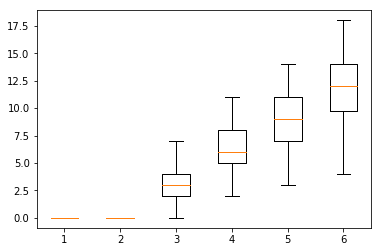

In [18]:
plt.boxplot(X)

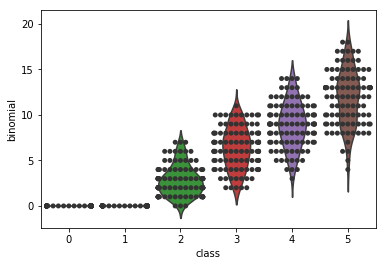

In [38]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ['trial','class','binomial'] # 시도, 주사위번호(1~6), 분포도
df
# sns.boxplot(x='class', y='binomial', data=df)  # [결과] plt.boxplot(X) 동일

# plt.grid(True)
# sns.stripplot(x='class', y='binomial', data=df, jitter=True)  # 검정색의 농도 : color='0.2'
# boxplot과 stripplot을 겹쳐서 보이기

# [추가] violinplot과 swarmplot 겹쳐서 보이기
# sns.violinplot(x='class', y='binomial', data=df, inner='stick')
# sns.violinplot(x='class', y='binomial', data=df, inner='quartile')  # 4분위수를 표시
        # inner 속성 {'box', 'point', 'stick', 'quartile', None}
sns.violinplot(x='class', y='binomial', data=df, inner=None)
sns.swarmplot(x='class', y='binomial', data=df, color='.2')